In [75]:
from sklearn.model_selection import train_test_split

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
data = pd.read_csv('adult.csv',header = None)

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
data.head()

,Age,Work_Class,fnlwgt,Education,No. of education years,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Working_Hours,Native,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
data.columns = ['Age','Work_Class','fnlwgt','Education','No. of education years','Marital_Status','Occupation','Relationship','Race','Gender','Capital_Gain','Capital_Loss','Working_Hours','Native','Income']

In [14]:
data.isnull().any()

Age                       False
Work_Class                False
fnlwgt                    False
Education                 False
No. of education years    False
Marital_Status            False
Occupation                False
Relationship              False
Race                      False
Gender                    False
Capital_Gain              False
Capital_Loss              False
Working_Hours             False
Native                    False
Income                    False
dtype: bool

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     32561 non-null  int64 
 1   Work_Class              32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   Education               32561 non-null  object
 4   No. of education years  32561 non-null  int64 
 5   Marital_Status          32561 non-null  object
 6   Occupation              32561 non-null  object
 7   Relationship            32561 non-null  object
 8   Race                    32561 non-null  object
 9   Gender                  32561 non-null  object
 10  Capital_Gain            32561 non-null  int64 
 11  Capital_Loss            32561 non-null  int64 
 12  Working_Hours           32561 non-null  int64 
 13  Native                  32561 non-null  object
 14  Income                  32561 non-null  object
dtypes:

In [17]:
data.describe()

,Age,fnlwgt,No. of education years,Capital_Gain,Capital_Loss,Working_Hours
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [34]:
data['Work_Class'].replace(to_replace= ' ?',value = 'No_Data',inplace=True)

In [37]:
data['Occupation'].replace(to_replace= ' ?',value = 'No_Data',inplace=True)

In [20]:
col_list = list(data.columns)

In [103]:
train, test = train_test_split(data,test_size = 0.2)

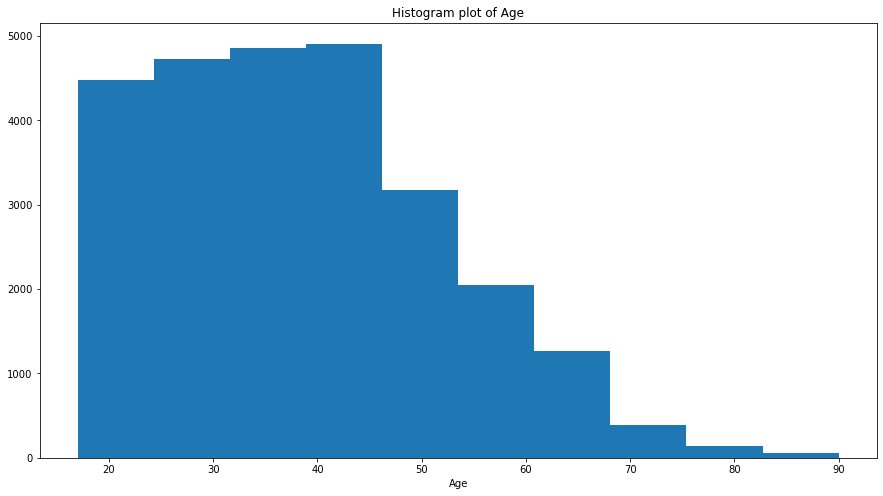

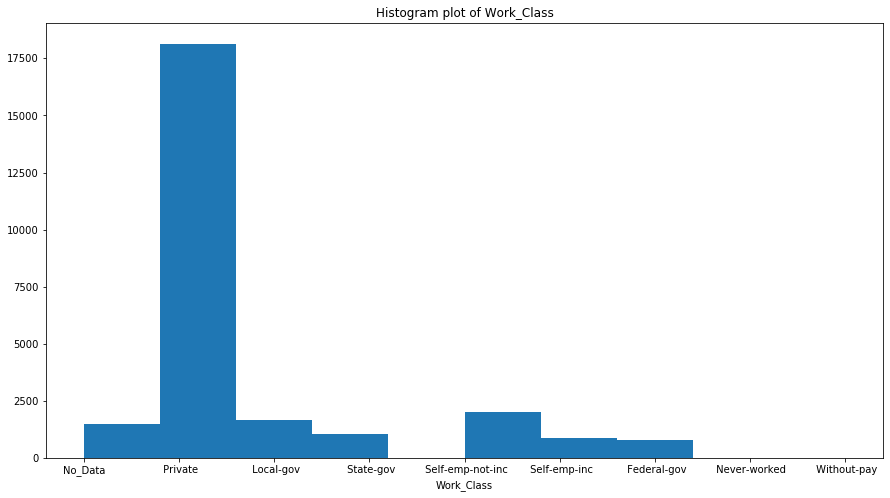

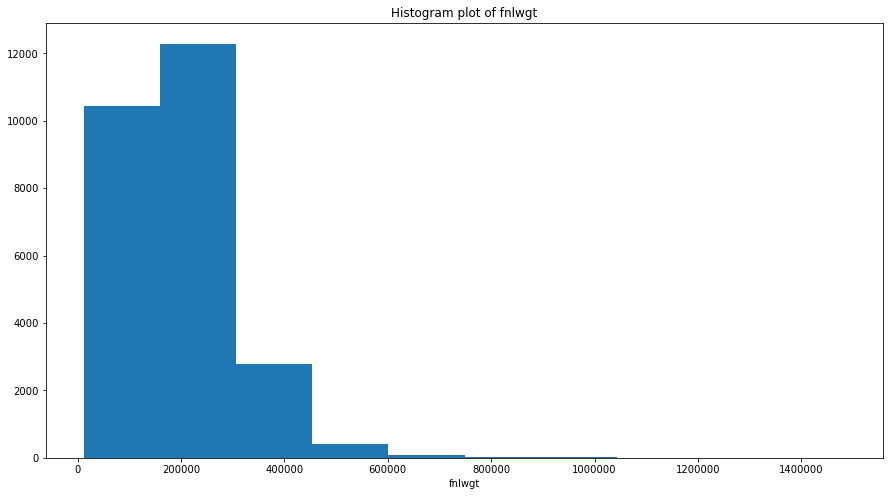

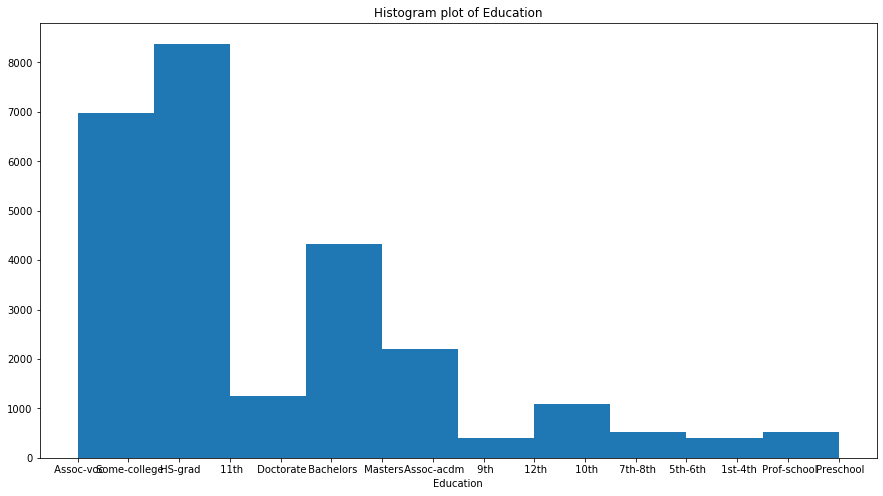

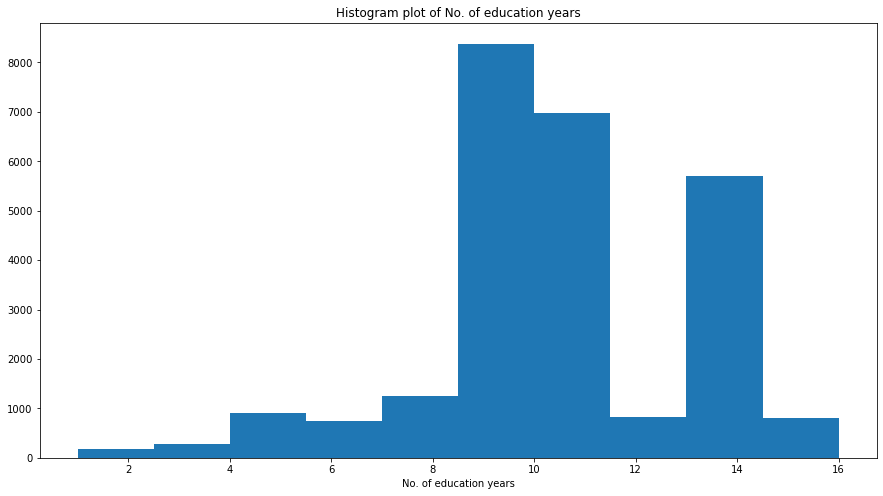

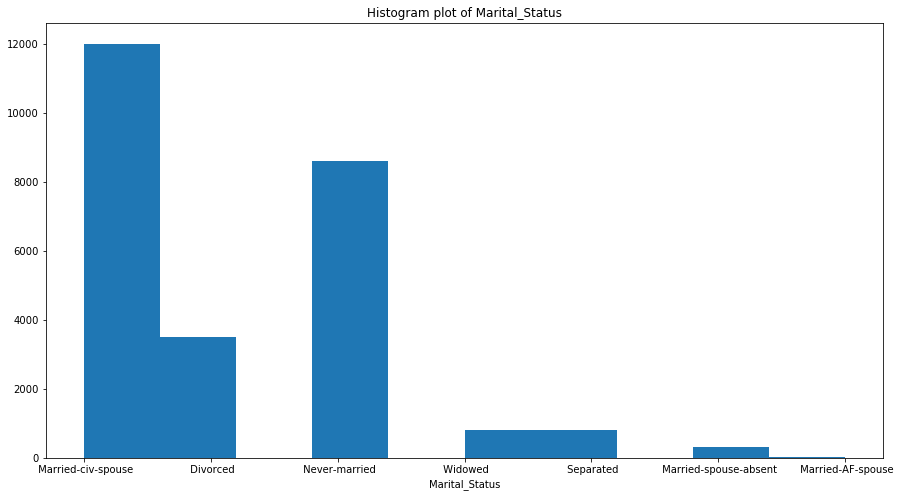

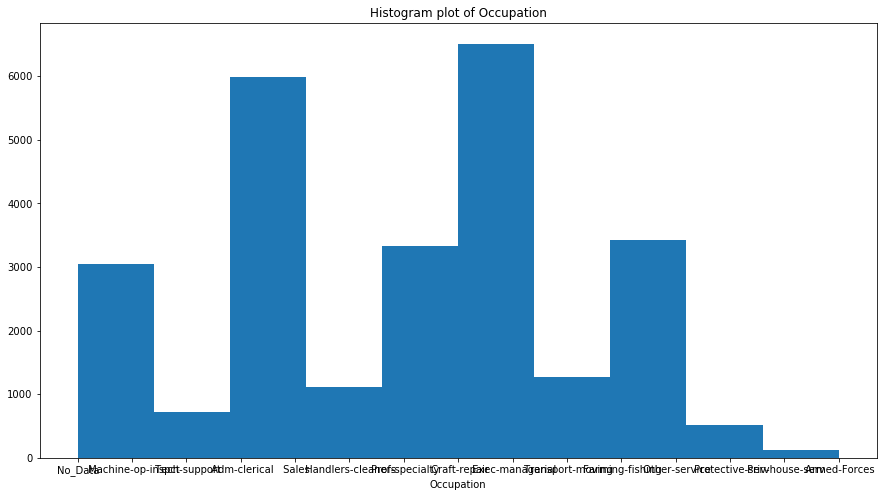

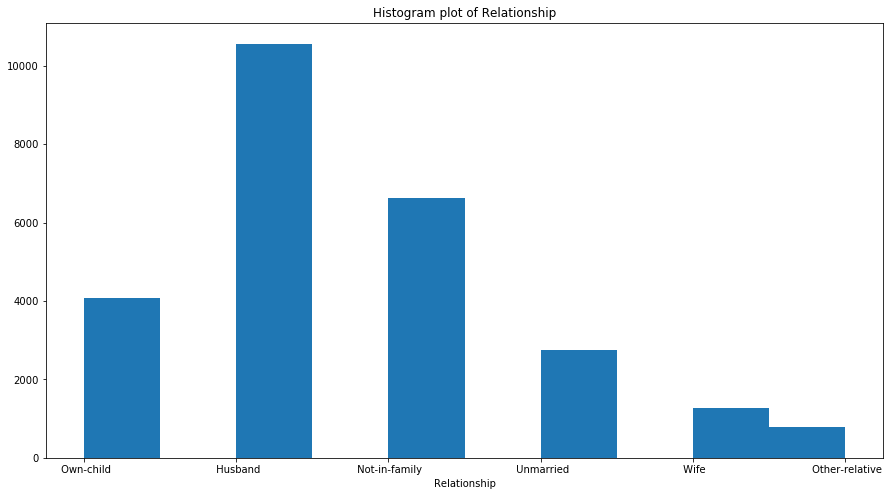

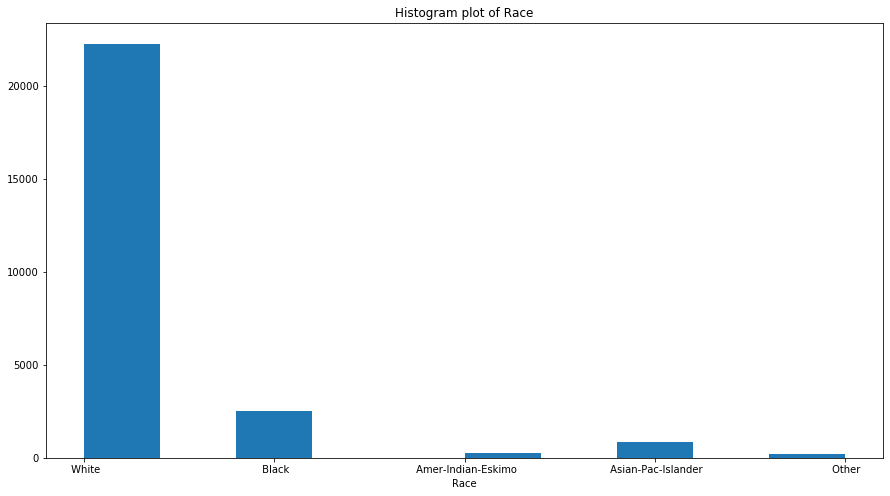

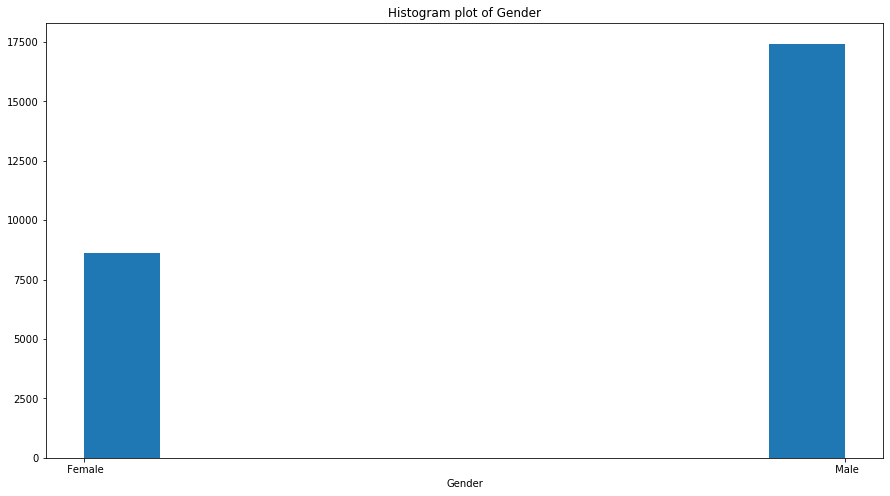

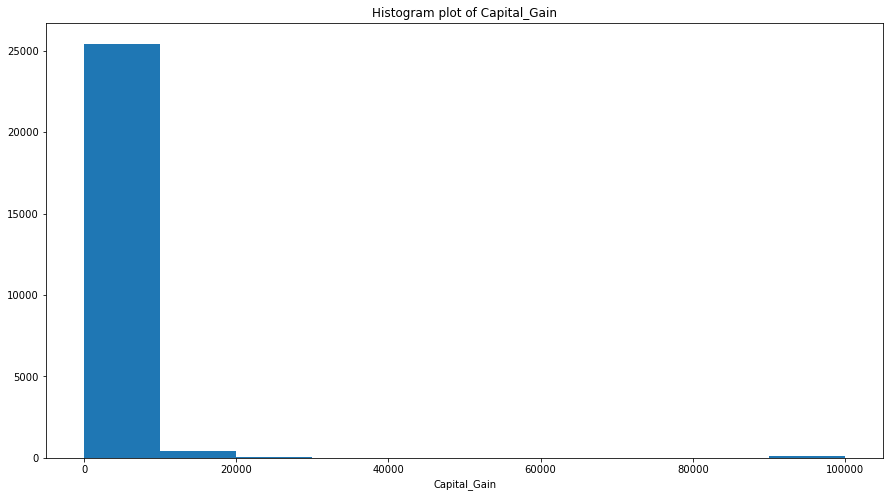

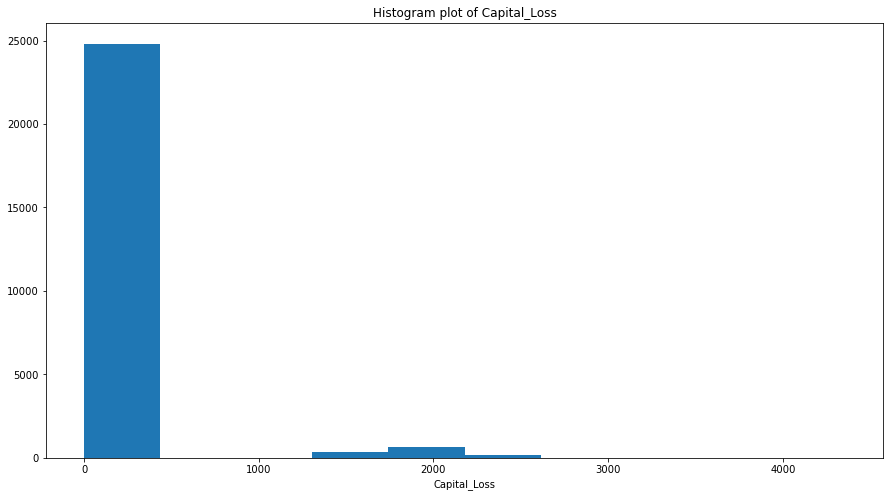

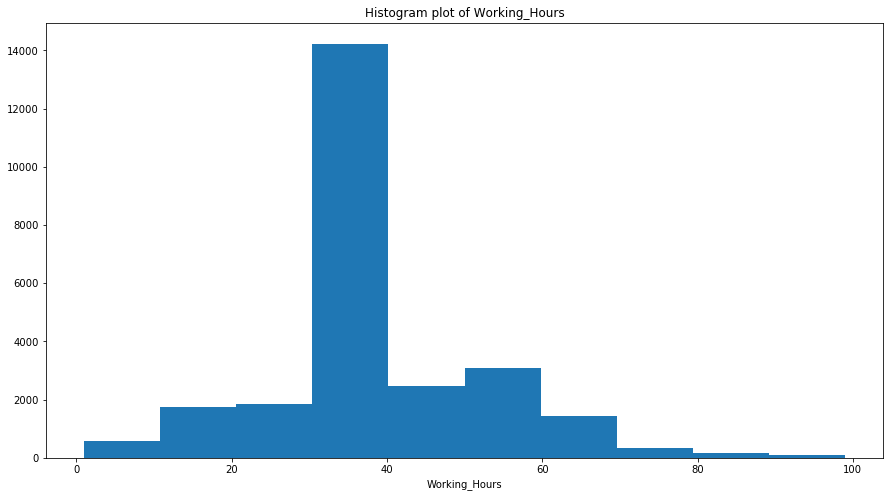

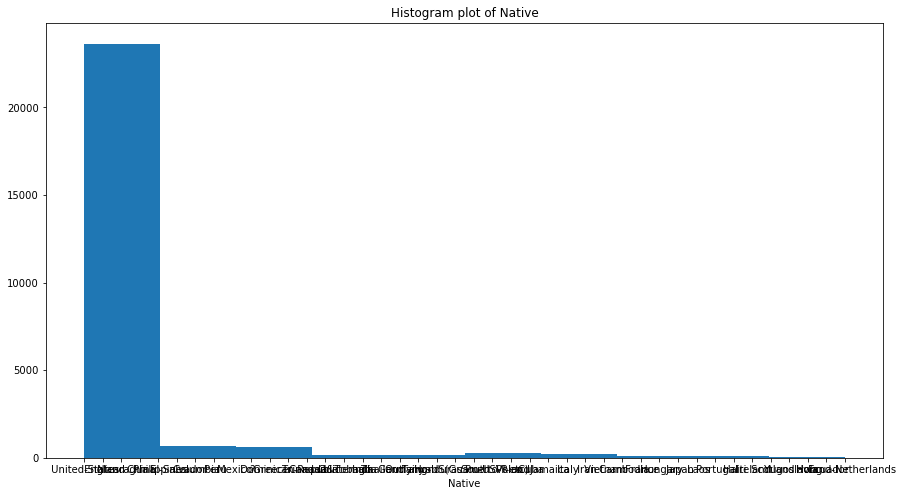

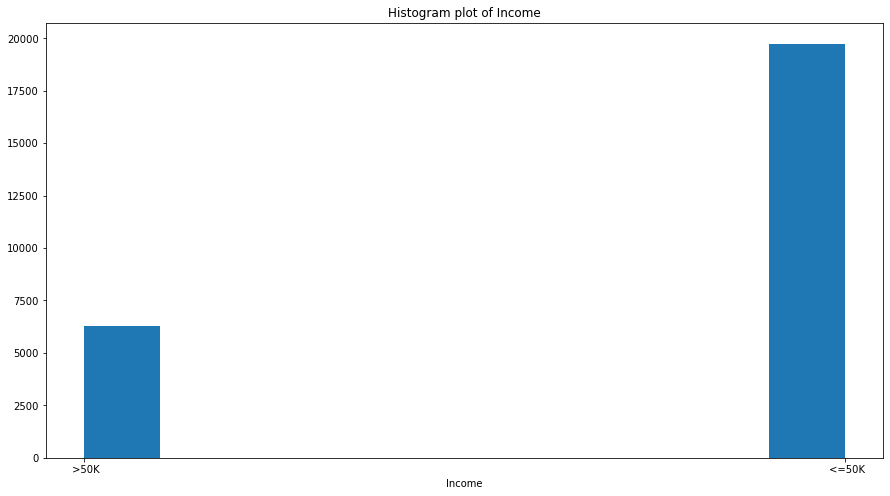

In [77]:
# Histograms of all features
for i in col_list:
    fig, ax = plt.subplots(figsize=(15,8))
    try:
        plt.hist(train[i])
        plt.title(f'Histogram plot of {i}')
        plt.xlabel(i)
        plt.savefig(f'images/hist_{i}.png')
        plt.show()
    except ValueError as ve:
        pass
    

In [32]:
data['Work_Class'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [78]:
#Selectin only categorical features for pie-charts
data1 = train.drop(columns=['Age','fnlwgt','No. of education years','Capital_Gain','Capital_Loss','Working_Hours'])

In [45]:
from collections import Counter

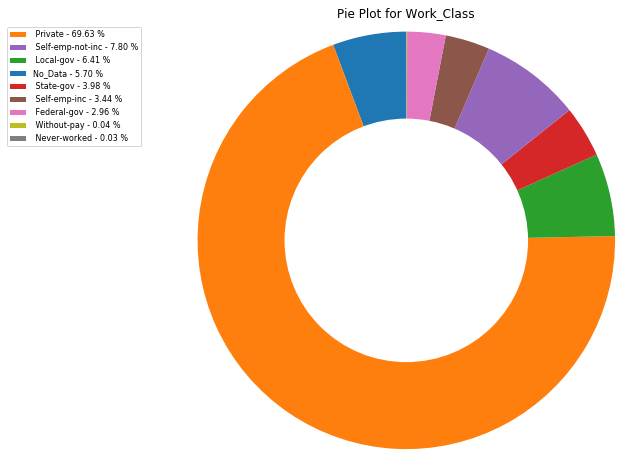

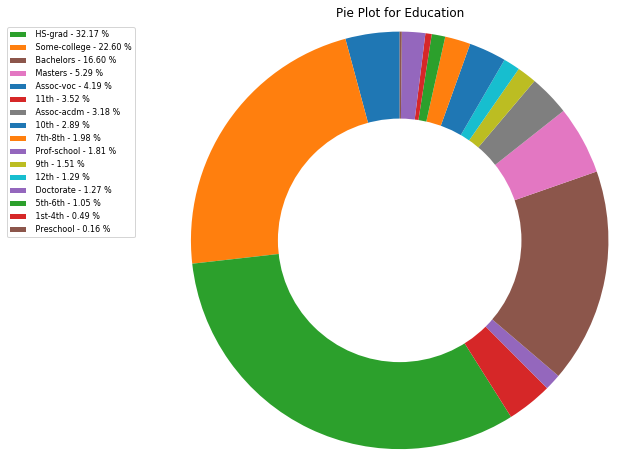

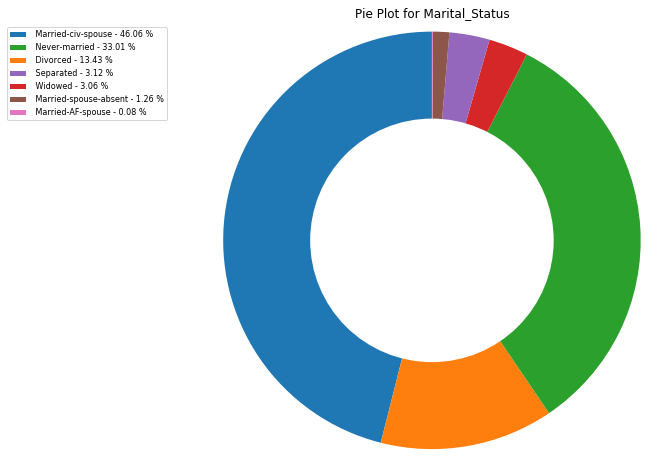

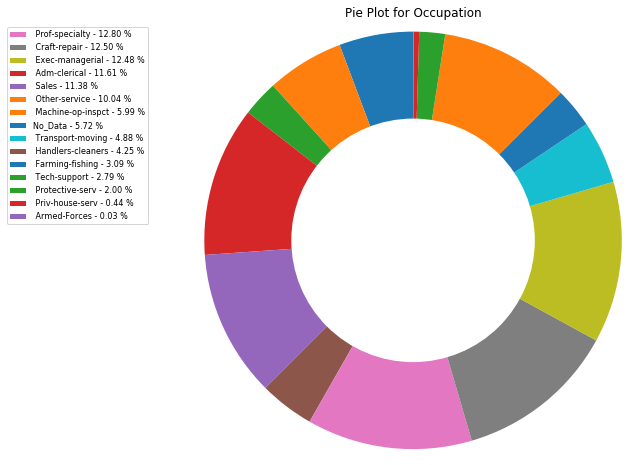

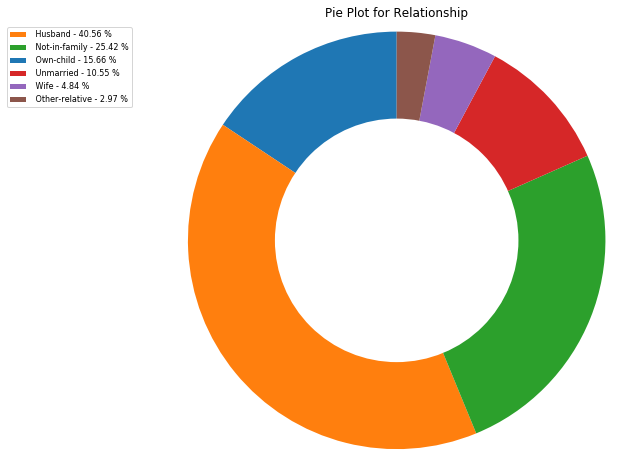

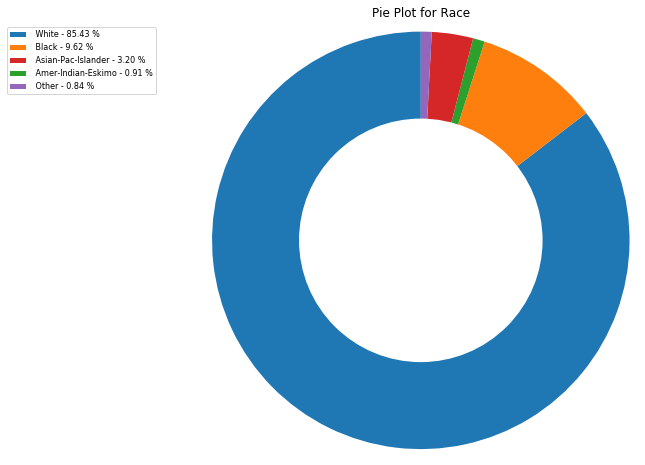

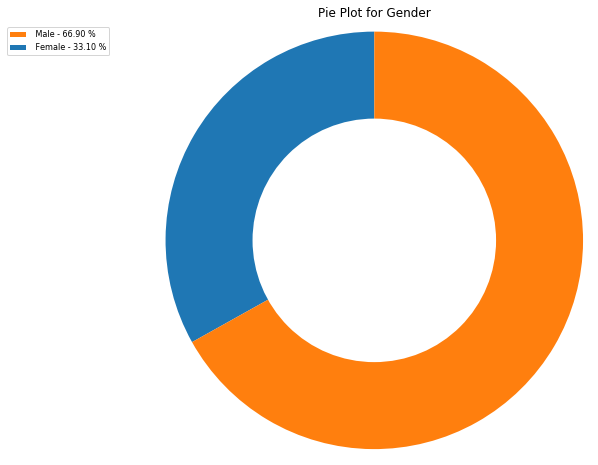

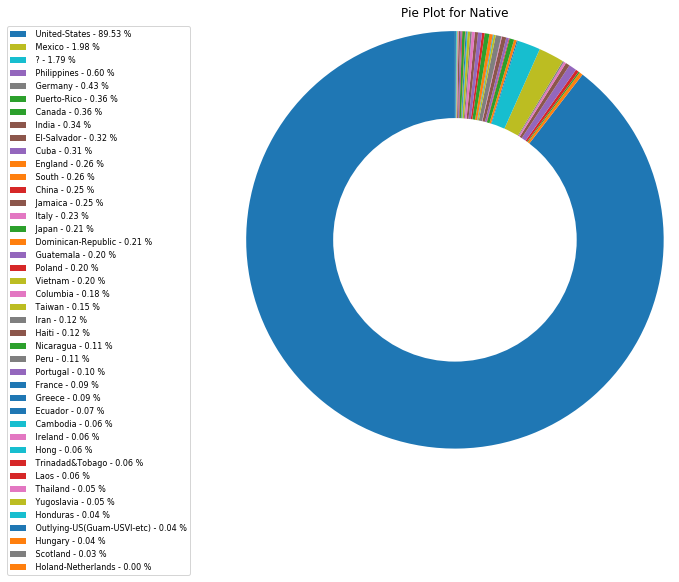

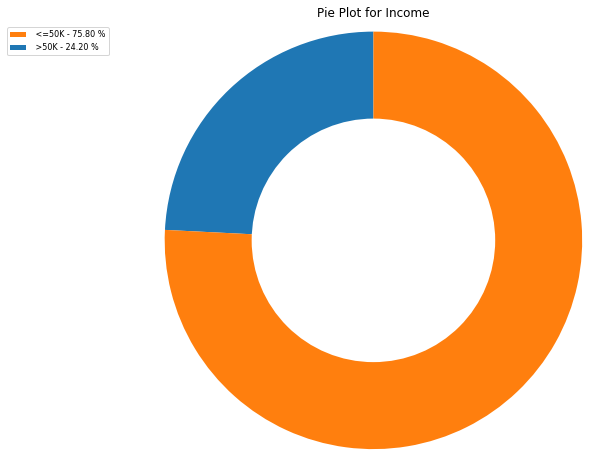

In [218]:
for i in list(data1.columns):
    fig, ax = plt.subplots(figsize=(8,8))
    #ax.set_title('Pie Chart of male and female who did not survive')
    #if i == 'Native':
    dct = Counter(data1[i])
    y = np.array(list(dct.values()))
    x = np.array(list(dct.keys()))
    #print(y)
#     ax.pie(dct.values(),labels = list(dct.keys()),autopct='%1.1f%%',pctdistance = 0.5,shadow=True, startangle=90)
#     ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
   
    porcent = 100.*y/y.sum()
    #print(y)
    
#     centre_circle = plt.Circle((0,0),0.70,fc='white')
#     fig = plt.gcf()
#     fig.gca().add_artist(centre_circle)
    patches, texts = plt.pie(y, startangle=90, radius=1.2)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                              key=lambda x: x[2],
                                              reverse=True))

    lgd = ax.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
               fontsize=8)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(f'Pie Plot for {i}')
    plt.savefig(f'images/pie_{i}.png',bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

#         plt.show()
#         dct = Counter(data1[i])
#         ax.pie(dct.values(), labels = list(dct.keys()),autopct='%1.1f%%',shadow=True, startangle=90)
#         ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#         #plt.savefig('images/pie_mf_0.png')

#         plt.show()

In [70]:
data.columns

Index(['Age', 'Work_Class', 'fnlwgt', 'Education', 'No. of education years',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Working_Hours', 'Native', 'Income'],
      dtype='object')

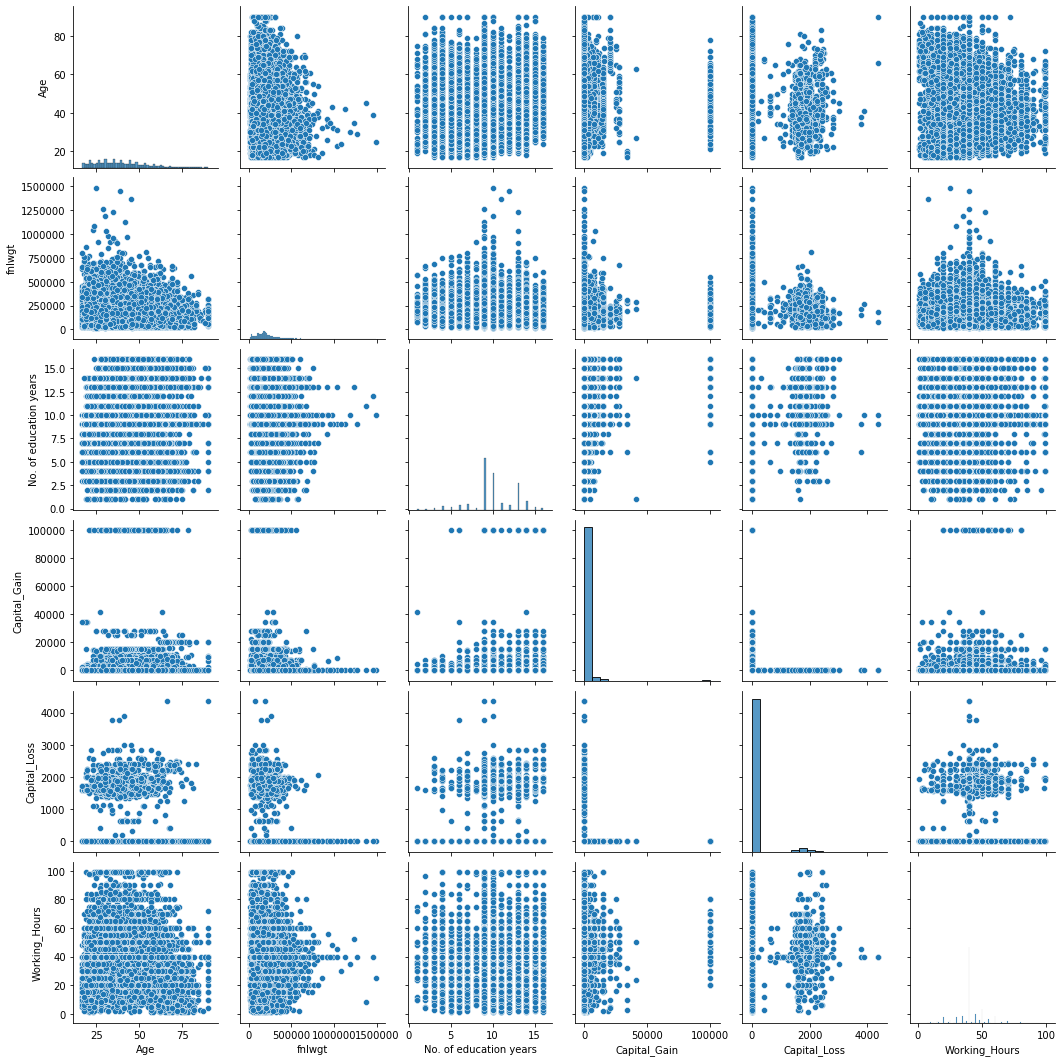

In [80]:
sns.pairplot(train)

In [82]:
from sklearn.preprocessing import OrdinalEncoder

In [94]:
from sklearn.preprocessing import LabelEncoder

In [84]:
train.columns

Index(['Age', 'Work_Class', 'fnlwgt', 'Education', 'No. of education years',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Working_Hours', 'Native', 'Income'],
      dtype='object')

In [86]:
# Ordinal Encoding categorical features
enc = OrdinalEncoder()
enc.fit(train[['Work_Class','Education','Marital_Status','Occupation','Relationship','Race','Gender','Native']])
encoded_feat = enc.transform(train[['Work_Class','Education','Marital_Status','Occupation','Relationship','Race','Gender','Native']])

In [87]:
train[['Work_Class','Education','Marital_Status','Occupation','Relationship','Race','Gender','Native']] = encoded_feat

In [88]:
train.head()

,Age,Work_Class,fnlwgt,Education,No. of education years,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Working_Hours,Native,Income
9211,33,8.0,193172,8.0,11,2.0,14.0,3.0,4.0,0.0,7688,0,50,39.0,>50K
10113,43,3.0,152420,15.0,10,2.0,6.0,0.0,2.0,1.0,0,0,50,39.0,<=50K
25627,44,3.0,222596,11.0,9,0.0,12.0,1.0,4.0,1.0,0,0,50,39.0,>50K
9825,38,1.0,84570,15.0,10,4.0,0.0,3.0,0.0,0.0,0,0,40,39.0,<=50K
29146,18,3.0,157131,1.0,7,4.0,11.0,3.0,4.0,0.0,0,0,30,39.0,<=50K


In [104]:
train.columns

Index(['Age', 'Work_Class', 'fnlwgt', 'Education', 'No. of education years',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Working_Hours', 'Native', 'Income'],
      dtype='object')

In [182]:
train, test = train_test_split(data,test_size = 0.2)

In [183]:
# converting continuous variables into categorical by binning
# Bin continuous vairbales into 20/25% quantiles
train['Age'] = pd.qcut(train['Age'], 5, labels=['bottom 20', 'lower 20', 'middle 20', 'upper 20', 'top 20'])
train['fnlwgt'] = pd.qcut(train['fnlwgt'], 5, labels=['bottom 20', 'lower 20', 'middle 20', 'upper 20', 'top 20'])
train['No. of education years'] = pd.qcut(train['No. of education years'], 5, duplicates='drop')
train['Capital_Gain'] = pd.qcut(train['Capital_Gain'], 5, duplicates='drop')
train['Capital_Loss'] = pd.qcut(train['Capital_Loss'], 5, duplicates='drop')
train['Working_Hours'] = pd.qcut(train['Working_Hours'], 5, duplicates='drop',labels=['bottom 25', 'lower 25', 'upper 25', 'top 20'])

test['Age'] = pd.qcut(test['Age'], 5, labels=['bottom 20', 'lower 20', 'middle 20', 'upper 20', 'top 20'])
test['fnlwgt'] = pd.qcut(test['fnlwgt'], 5, labels=['bottom 20', 'lower 20', 'middle 20', 'upper 20', 'top 20'])
test['No. of education years'] = pd.qcut(test['No. of education years'], 5, duplicates='drop')
test['Capital_Gain'] = pd.qcut(test['Capital_Gain'], 5,  duplicates='drop')
test['Capital_Loss'] = pd.qcut(test['Capital_Loss'], 5, duplicates='drop')
test['Working_Hours'] = pd.qcut(test['Working_Hours'], 5, duplicates='drop',labels=['bottom 25', 'lower 25', 'upper 25', 'top 20'])


In [174]:
test['Working_Hours'].unique() # quartiles

['lower 25', 'top 20', 'bottom 25', 'upper 25']
Categories (4, object): ['bottom 25' < 'lower 25' < 'upper 25' < 'top 20']

In [175]:
train['Working_Hours'].unique()

['top 20', 'lower 25', 'upper 25', 'bottom 25']
Categories (4, object): ['bottom 25' < 'lower 25' < 'upper 25' < 'top 20']

In [171]:
pd.DataFrame(train).tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
26043,1.0,3.0,0.0,11.0,0.0,0.0,10.0,1.0,4.0,1.0,0.0,0.0,3.0,39.0
26044,1.0,3.0,1.0,0.0,0.0,4.0,7.0,3.0,2.0,0.0,0.0,0.0,0.0,39.0
26045,4.0,3.0,4.0,15.0,1.0,0.0,9.0,4.0,4.0,0.0,0.0,0.0,0.0,39.0
26046,1.0,3.0,1.0,9.0,2.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,3.0,39.0
26047,3.0,8.0,0.0,11.0,0.0,2.0,14.0,5.0,1.0,0.0,0.0,0.0,1.0,39.0


In [177]:
test.head()

,Age,Work_Class,fnlwgt,Education,No. of education years,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Working_Hours,Native,Income
21291,upper 20,Self-emp-inc,upper 20,Bachelors,"(10.0, 13.0]",Married-civ-spouse,Sales,Husband,White,Male,"(-0.001, 99999.0]","(-0.001, 4356.0]",lower 25,United-States,>50K
8434,bottom 20,Private,lower 20,HS-grad,"(0.999, 9.0]",Married-civ-spouse,Sales,Husband,Black,Male,"(-0.001, 99999.0]","(-0.001, 4356.0]",lower 25,United-States,<=50K
17424,upper 20,Private,upper 20,HS-grad,"(0.999, 9.0]",Married-civ-spouse,Sales,Husband,White,Male,"(-0.001, 99999.0]","(-0.001, 4356.0]",top 20,United-States,<=50K
27100,top 20,No_Data,middle 20,Bachelors,"(10.0, 13.0]",Married-civ-spouse,No_Data,Husband,White,Male,"(-0.001, 99999.0]","(-0.001, 4356.0]",bottom 25,United-States,>50K
4820,bottom 20,Private,top 20,HS-grad,"(0.999, 9.0]",Married-civ-spouse,Machine-op-inspct,Husband,White,Male,"(-0.001, 99999.0]","(-0.001, 4356.0]",lower 25,United-States,<=50K


In [190]:
X_train = train.drop(columns=['Income'])
y_train = train['Income']
X_test = test.drop(columns=['Income'])
y_test = test['Income']

In [192]:
X_train = X_train.drop(columns=['Capital_Gain','Capital_Loss'])
X_test = X_test.drop(columns=['Capital_Gain','Capital_Loss'])

In [193]:
enc = OrdinalEncoder()
enc.fit(X_train)
encoded_feat = enc.transform(X_train)
X_train = encoded_feat
X_test = enc.transform(X_test)

In [194]:
enc.categories_

[array(['bottom 20', 'lower 20', 'middle 20', 'top 20', 'upper 20'],
       dtype=object),
 array([' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
        ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay',
        'No_Data'], dtype=object),
 array(['bottom 20', 'lower 20', 'middle 20', 'top 20', 'upper 20'],
       dtype=object),
 array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object),
 array([Interval(0.999, 9.0, closed='right'),
        Interval(9.0, 10.0, closed='right'),
        Interval(10.0, 13.0, closed='right'),
        Interval(13.0, 16.0, closed='right')], dtype=object),
 array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
        ' Married-spouse-absent', ' Never-married', ' Separated',
        ' Widowed'], dtype=object),
 array([' Adm-clerical', '

In [195]:
# Label Encoding the output classes - 0 / 1
enc = LabelEncoder()
enc.fit(train['Income'])
encoded_feat = enc.transform(train['Income'])
train['Income'] = encoded_feat
test['Income'] = enc.transform(test['Income'])

In [196]:
y_train = train['Income']
y_test = test['Income']

In [101]:
enc.classes_

array([' <=50K', ' >50K'], dtype=object)

In [102]:
train.columns

Index(['Age', 'Work_Class', 'fnlwgt', 'Education', 'No. of education years',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Working_Hours', 'Native', 'Income'],
      dtype='object')

In [197]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.0,5.0,4.0,15.0,1.0,2.0,2.0,0.0,4.0,1.0,1.0,39.0
1,4.0,3.0,2.0,15.0,1.0,0.0,0.0,4.0,4.0,0.0,1.0,39.0
2,1.0,4.0,0.0,11.0,0.0,2.0,3.0,0.0,4.0,1.0,1.0,39.0
3,2.0,3.0,3.0,9.0,2.0,0.0,12.0,4.0,2.0,1.0,3.0,0.0
4,0.0,3.0,3.0,11.0,0.0,4.0,4.0,1.0,4.0,1.0,2.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26043,2.0,1.0,1.0,11.0,0.0,2.0,10.0,0.0,4.0,1.0,2.0,39.0
26044,0.0,8.0,3.0,1.0,0.0,4.0,14.0,2.0,4.0,0.0,0.0,39.0
26045,4.0,3.0,4.0,11.0,0.0,0.0,5.0,1.0,4.0,1.0,2.0,39.0
26046,1.0,3.0,2.0,11.0,0.0,4.0,2.0,1.0,0.0,1.0,1.0,39.0


In [198]:
y_train

15239    1
14490    0
21210    1
12899    1
11795    0
        ..
29813    0
9927     0
8693     0
607      0
4862     1
Name: Income, Length: 26048, dtype: int64

In [199]:
y_test

11011    0
27079    1
4404     1
31313    0
23536    0
        ..
14236    1
29895    0
2053     0
4293     0
17984    0
Name: Income, Length: 6513, dtype: int64

In [200]:
X_test

array([[ 4.,  0.,  0., ...,  1.,  3., 39.],
       [ 3.,  0.,  0., ...,  1.,  1., 39.],
       [ 4.,  3.,  3., ...,  1.,  1., 39.],
       ...,
       [ 0.,  3.,  4., ...,  1.,  2., 26.],
       [ 1.,  3.,  4., ...,  1.,  1., 39.],
       [ 3.,  4.,  1., ...,  0.,  2., 35.]])

In [201]:
from sklearn.naive_bayes import CategoricalNB

In [211]:
# Building the Categorical Naive-Bayes model and fitting on train data
clf = CategoricalNB()
clf.fit(X_train,y_train)
clf.score(X_train,y_train) # accuracy on train data

0.8123464373464373

In [212]:
clf.score(X_test,y_test) # accuracy on train data

0.806540764624597

In [222]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.0,5.0,4.0,15.0,1.0,2.0,2.0,0.0,4.0,1.0,1.0,39.0
1,4.0,3.0,2.0,15.0,1.0,0.0,0.0,4.0,4.0,0.0,1.0,39.0
2,1.0,4.0,0.0,11.0,0.0,2.0,3.0,0.0,4.0,1.0,1.0,39.0
3,2.0,3.0,3.0,9.0,2.0,0.0,12.0,4.0,2.0,1.0,3.0,0.0
4,0.0,3.0,3.0,11.0,0.0,4.0,4.0,1.0,4.0,1.0,2.0,39.0


In [223]:
X_train = pd.DataFrame(X_train)
X_train.columns = ['Age', 'Work_Class', 'fnlwgt', 'Education', 'No. of education years',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender','Working_Hours', 'Native']

In [220]:
train.columns

Index(['Age', 'Work_Class', 'fnlwgt', 'Education', 'No. of education years',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Working_Hours', 'Native', 'Income'],
      dtype='object')

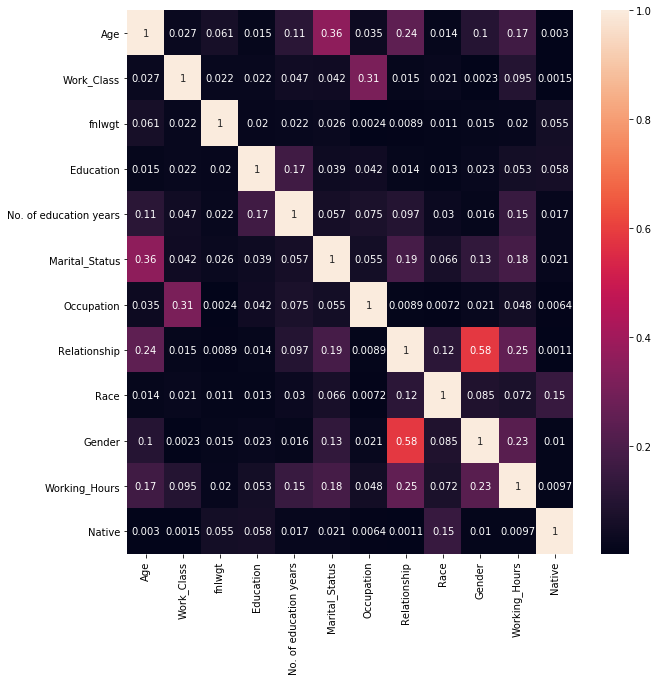

In [224]:
# Correlation between features
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(abs(pd.DataFrame(X_train).corr()),annot=True)
plt.savefig('images/corr.png')
plt.show()

In [225]:
len(data)

32561